## Conjunto de Dados do Wine

_____________________________________________

Disciplina: Aprendizado de Máquina

* Istefferson Oliveira da Silva
_____________________________________________

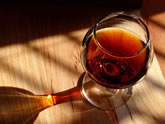

Informações do conjunto de dados:

Esses dados são resultados de uma análise química de vinhos cultivados na mesma região da Itália, mas derivados de três cultivares diferentes. A análise determinou as quantidades de 13 constituintes encontrados em cada um dos três tipos de vinhos.

Eu acho que o conjunto de dados inicial tinha cerca de 30 variáveis, mas por algum motivo eu só tenho a versão de 13 dimensões. Eu tinha uma lista de cerca de 30 variáveis, mas a.) eu a perdi, e b.), eu não saberia quais 13 variáveis ​​estão incluídas no conjunto.

Os atributos são (dotados por Riccardo Leardi, riclea '@' anchem.unige.it )
* 1) Alcohol
* 2) Malic acid
* 3) Ash
* 4) Alcalinity of ash
* 5) Magnesium
* 6) Total phenols
* 7) Flavanoids
* 8) Nonflavanoid phenols
* 9) Proanthocyanins
* 10)Color intensity
* 11)Hue
* 12)OD280/OD315 of diluted wines
* 13)Proline


Em um contexto de classificação, este é um problema bem colocado com estruturas de classe "bem comportadas". Um bom conjunto de dados para o primeiro teste de um novo classificador, mas não muito desafiador.


**Informações do atributo:**

Todos os atributos são contínuos

Não há estatísticas disponíveis, mas sugerimos padronizar variáveis ​​para determinados usos (por exemplo, para nós com classificadores que NÃO são invariantes de escala)

NOTA: 1º atributo é identificador de classe (1-3)


http://archive.ics.uci.edu/ml/datasets/Wine

## Importação das Bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

## Visualizando os Dados

In [3]:
df = pd.read_csv('wine.data', encoding='ISO-8859-1', 
                 names=['Identificador',
                        'Alcohol',
                        'Malic acid',
                        'Ash',
                        'Alcalinity of ash',  
                        'Magnesium',
                        'Total phenols',
                        'Flavanoids',
                        'Nonflavanoid phenols',
                        'Proanthocyanins',
                        'Color intensity',
                        'Hue',
                        'Diluted wines',
                        'Proline'])

In [4]:
df

,Identificador,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
df.describe().round(2)

,Identificador,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Diluted wines,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,1.94,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.78,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,1.00,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,1.00,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50
50%,2.00,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,3.00,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,3.00,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


In [6]:
X = np.array(df)
X

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [7]:
X = np.array(df.drop('Identificador',1))
X

C:\Users\DELL\AppData\Local\Temp/ipykernel_22772/3887505697.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop('Identificador',1))


array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [8]:
y = np.array(df['Identificador'])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

## TREINANDO O MODELO - MLP

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5, random_state=6)

## TREINANDO O MODELO ARVORE DE DECISÃO

In [11]:
from sklearn.neural_network import MLPClassifier

In [12]:
len(df.columns)

14

In [264]:
mlp_wine = MLPClassifier(max_iter=1000,
                         verbose=True,
                         tol=0.0000000100,
                         solver="adam", 
                         activation="relu",
                         random_state=5)

In [265]:
mlp_wine.fit(X_train,Y_train)

Iteration 1, loss = 23.81576026
Iteration 2, loss = 23.54586129
Iteration 3, loss = 22.50686265
Iteration 4, loss = 19.96340214
Iteration 5, loss = 15.66942766
Iteration 6, loss = 14.03689889
Iteration 7, loss = 15.39742738
Iteration 8, loss = 15.15028756
Iteration 9, loss = 13.28739129
Iteration 10, loss = 11.99113903
Iteration 11, loss = 14.96412458
Iteration 12, loss = 15.75614639
Iteration 13, loss = 14.64434112
Iteration 14, loss = 12.05841380
Iteration 15, loss = 9.91759707
Iteration 16, loss = 10.15861022
Iteration 17, loss = 9.35457563
Iteration 18, loss = 7.52692566
Iteration 19, loss = 4.88862418
Iteration 20, loss = 3.14206625
Iteration 21, loss = 4.29464033
Iteration 22, loss = 5.74673754
Iteration 23, loss = 6.53736532
Iteration 24, loss = 6.31988339
Iteration 25, loss = 5.13662351
Iteration 26, loss = 3.35612027
Iteration 27, loss = 2.06512101
Iteration 28, loss = 3.09822020
Iteration 29, loss = 3.93077802
Iteration 30, loss = 3.92402937
Iteration 31, loss = 3.45390511
It

Iteration 367, loss = 0.15497390
Iteration 368, loss = 0.15554183
Iteration 369, loss = 0.15377649
Iteration 370, loss = 0.15300853
Iteration 371, loss = 0.15227571
Iteration 372, loss = 0.15164187
Iteration 373, loss = 0.15219769
Iteration 374, loss = 0.15149888
Iteration 375, loss = 0.15015131
Iteration 376, loss = 0.14991556
Iteration 377, loss = 0.14966319
Iteration 378, loss = 0.14882237
Iteration 379, loss = 0.14836669
Iteration 380, loss = 0.14744085
Iteration 381, loss = 0.14744612
Iteration 382, loss = 0.14707082
Iteration 383, loss = 0.14654912
Iteration 384, loss = 0.14639120
Iteration 385, loss = 0.14601225
Iteration 386, loss = 0.14557730
Iteration 387, loss = 0.14492942
Iteration 388, loss = 0.14537351
Iteration 389, loss = 0.14479250
Iteration 390, loss = 0.14419928
Iteration 391, loss = 0.14388849
Iteration 392, loss = 0.14365148
Iteration 393, loss = 0.14298429
Iteration 394, loss = 0.14282499
Iteration 395, loss = 0.14227712
Iteration 396, loss = 0.14174549
Iteration 

Iteration 725, loss = 0.07506523
Iteration 726, loss = 0.07658669
Iteration 727, loss = 0.07480378
Iteration 728, loss = 0.07561328
Iteration 729, loss = 0.07458234
Iteration 730, loss = 0.07602379
Iteration 731, loss = 0.07468694
Iteration 732, loss = 0.07525513
Iteration 733, loss = 0.07420892
Iteration 734, loss = 0.07612724
Iteration 735, loss = 0.07394537
Iteration 736, loss = 0.07436600
Iteration 737, loss = 0.07346404
Iteration 738, loss = 0.07502829
Iteration 739, loss = 0.07344824
Iteration 740, loss = 0.07401426
Iteration 741, loss = 0.07322552
Iteration 742, loss = 0.07315592
Iteration 743, loss = 0.07309052
Iteration 744, loss = 0.07294732
Iteration 745, loss = 0.07338750
Iteration 746, loss = 0.07323684
Iteration 747, loss = 0.07239954
Iteration 748, loss = 0.07357976
Iteration 749, loss = 0.07242141
Iteration 750, loss = 0.07226121
Iteration 751, loss = 0.07191810
Iteration 752, loss = 0.07295596
Iteration 753, loss = 0.07184032
Iteration 754, loss = 0.07228696
Iteration 

MLPClassifier(max_iter=1000, random_state=5, tol=1e-08, verbose=True)

In [266]:
mlp_wine.hidden_layer_sizes

(100,)

## TESTANDO O MODELO

Testando um único valor:

In [105]:
X[1]

array([1.32e+01, 1.78e+00, 2.14e+00, 1.12e+01, 1.00e+02, 2.65e+00,
       2.76e+00, 2.60e-01, 1.28e+00, 4.38e+00, 1.05e+00, 3.40e+00,
       1.05e+03])

In [106]:
mlp_wine.predict([[1.32e+01, 1.78e+00, 2.14e+00, 1.12e+01, 1.00e+02, 2.65e+00,
                   2.76e+00, 2.60e-01, 1.28e+00, 4.38e+00, 1.05e+00, 3.40e+00,
                   1.05e+03]])

array([1], dtype=int64)

verificando os dados de teste:

In [107]:
df.columns

Index(['Identificador', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'Diluted wines',
       'Proline'],
      dtype='object')

In [108]:
TESTE = pd.DataFrame(data=X_test)
TESTE.columns = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
               'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
               'Proanthocyanins', 'Color intensity', 'Hue', 'Diluted wines',
               'Proline']
TESTE.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Diluted wines,Proline
0,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0
1,12.29,1.41,1.98,16.0,85.0,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428.0
2,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0
3,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0
4,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0


In [109]:
TESTE['real_target'] = Y_test
TESTE.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Diluted wines,Proline,real_target
0,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0,1
1,12.29,1.41,1.98,16.0,85.0,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428.0,2
2,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0,2
3,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,2
4,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0,1


In [110]:
TESTE['predict_target'] = mlp_wine.predict(X_test)

## ITENS QUE NÃO FORAM PREVISTOS CORRETAENTE

In [111]:
TESTE[TESTE['real_target'] != TESTE['predict_target']]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Diluted wines,Proline,real_target,predict_target
13,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1,2
82,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886.0,2,1


## Acurácia do Modelo

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [113]:
acuracia_iris = accuracy_score(Y_test, mlp_wine.predict(X_test))
acuracia_iris

0.9775280898876404

## Matrix Confusão

In [114]:
conf_matrix_iris = confusion_matrix(Y_test, mlp_wine.predict(X_test))
conf_matrix_iris

array([[32,  1,  0],
       [ 1, 37,  0],
       [ 0,  0, 18]], dtype=int64)

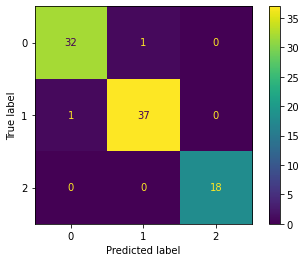

In [115]:

ConfusionMatrixDisplay(conf_matrix_iris).plot()

plt.show()

# Report do Resultado Final

In [116]:
df['Identificador'].unique()

array([1, 2, 3], dtype=int64)

In [117]:
report_iris = classification_report(Y_test, mlp_wine.predict(X_test), target_names=["1", "2", "3"])

In [118]:
print(report_iris)

              precision    recall  f1-score   support

           1       0.97      0.97      0.97        33
           2       0.97      0.97      0.97        38
           3       1.00      1.00      1.00        18

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



## Conclusão Modelo Redes Neurais

* número de épocas = 1000 (parou na época 849, pois não variou mais o modelo)
* Distância entre os W = 0.0000000100,
* Otimização = "adam", 
* Função de Ativação = "relu",

O modelo previu:

* 97% das amostras estão na localidade 01, com 97% de precisão;
* 97% das amostras estão na localidade 02, com 97% de precisão;
* 100% das amostras estão na localidade 03, com 100% de precisão.

Acurácia do Modelo: 98%

**Testado também com outras configurações, essa foi o que deu melhor resultado até o momento para o MLP.**

_____________________________________________________________

## TREINANDO O MODELO SMV

In [120]:
from sklearn.svm import SVC

In [238]:
svm_wine = SVC(kernel='linear', random_state=5, C=1)

# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [239]:
svm_wine.fit(X_train,Y_train)

SVC(C=1, kernel='linear', random_state=5)

## TESTANDO O MODELO

Testando um único valor:

In [240]:
svm_wine.predict([[1.32e+01, 1.78e+00, 2.14e+00, 1.12e+01, 1.00e+02, 2.65e+00,
                   2.76e+00, 2.60e-01, 1.28e+00, 4.38e+00, 1.05e+00, 3.40e+00,
                   1.05e+03]])

array([1], dtype=int64)

verificando os dados de teste:

In [241]:
TESTE = pd.DataFrame(data=X_test)
TESTE.columns = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
               'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
               'Proanthocyanins', 'Color intensity', 'Hue', 'Diluted wines',
               'Proline']
TESTE.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Diluted wines,Proline
0,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0
1,12.29,1.41,1.98,16.0,85.0,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428.0
2,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0
3,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0
4,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0


In [242]:
TESTE['real_target'] = Y_test
TESTE.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Diluted wines,Proline,real_target
0,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0,1
1,12.29,1.41,1.98,16.0,85.0,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428.0,2
2,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0,2
3,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,2
4,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0,1


In [243]:
TESTE['predict_target'] = svm_wine.predict(X_test)

## ITENS QUE NÃO FORAM PREVISTOS CORRETAENTE

In [244]:
TESTE[TESTE['real_target'] != TESTE['predict_target']]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Diluted wines,Proline,real_target,predict_target
24,12.64,1.36,2.02,16.8,100.0,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450.0,2,3
67,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0,2,1
74,13.05,3.86,2.32,22.5,85.0,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515.0,2,3


## Acurácia do Modelo

In [245]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [246]:
acuracia_iris = accuracy_score(Y_test, svm_wine.predict(X_test))
acuracia_iris

0.9662921348314607

## Matrix Confusão

In [247]:
conf_matrix_iris = confusion_matrix(Y_test, svm_wine.predict(X_test))
conf_matrix_iris

array([[33,  0,  0],
       [ 1, 35,  2],
       [ 0,  0, 18]], dtype=int64)

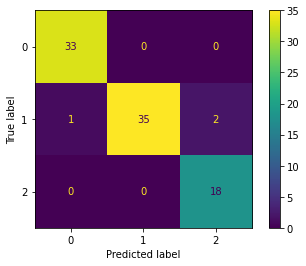

In [248]:

ConfusionMatrixDisplay(conf_matrix_iris).plot()

plt.show()

# Report do Resultado Final

In [249]:
report_iris = classification_report(Y_test, svm_wine.predict(X_test), target_names=["1", "2", "3"])

In [250]:
print(report_iris)

              precision    recall  f1-score   support

           1       0.97      1.00      0.99        33
           2       1.00      0.92      0.96        38
           3       0.90      1.00      0.95        18

    accuracy                           0.97        89
   macro avg       0.96      0.97      0.96        89
weighted avg       0.97      0.97      0.97        89



## Conclusão Modelo SVM

kernel = 'linear' 
Penalidade = 1

O modelo previu:

* 100% das amostras estão na localidade 01, com 97% de precisão;
* 92% das amostras estão na localidade 02, com 100% de precisão;
* 100% das amostras estão na localidade 03, com 90% de precisão.

Acurácia do Modelo: 97%

**Testado também com outras configurações, essa foi o que deu melhor resultado até o momento para o SVM.**
_________________________________________________________